In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from models.UNet import *


In [2]:
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16.npy")[0:200, :, :, :]
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16.npy")[0:200, :, :, :]


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]

In [3]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.4, random_state=4)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5, random_state=4)

print(x_train.shape, y_train.shape)

(120, 512, 512, 1) (120, 512, 512, 5)


In [4]:
seg_model = UNet(img_shape = (H, W, 1), num_of_class = C,learning_rate = 2e-4, do_drop = True, drop_rate = 0.5)
seg_model.build_model_VGG13()
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [5]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 20, batch_size = 2)

Epoch 1/20
60/60 [==============================] - 806s 13s/step - loss: 3.1619 - dice_coef_multilabel: 0.0400 - iou_multilabel: 0.0221 - val_loss: 0.7184 - val_dice_coef_multilabel: 0.0941 - val_iou_multilabel: 0.0557
INFO:tensorflow:Assets written to: saved_models/UNet_model/assets
Epoch 2/20
60/60 [==============================] - 812s 14s/step - loss: 0.6521 - dice_coef_multilabel: 0.1271 - iou_multilabel: 0.0788 - val_loss: 0.4102 - val_dice_coef_multilabel: 0.1162 - val_iou_multilabel: 0.0709
INFO:tensorflow:Assets written to: saved_models/UNet_model/assets
Epoch 3/20
60/60 [==============================] - 862s 14s/step - loss: 0.4537 - dice_coef_multilabel: 0.1355 - iou_multilabel: 0.0856 - val_loss: 0.7589 - val_dice_coef_multilabel: 0.1446 - val_iou_multilabel: 0.0931
INFO:tensorflow:Assets written to: saved_models/UNet_model/assets
Epoch 4/20
60/60 [==============================] - 849s 14s/step - loss: 0.4750 - dice_coef_multilabel: 0.1208 - iou_multilabel: 0.0754 - val

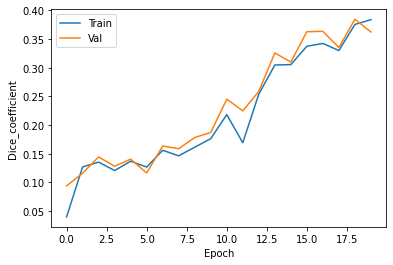

In [6]:
plot_dice(history)

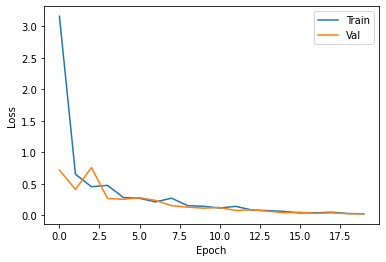

In [7]:
plot_loss(history)

In [6]:
preds = loaded_model.predict(x_test)

In [9]:
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())

TEST DICE_COEF:  0.45521498
TEST IoU:  0.4068083


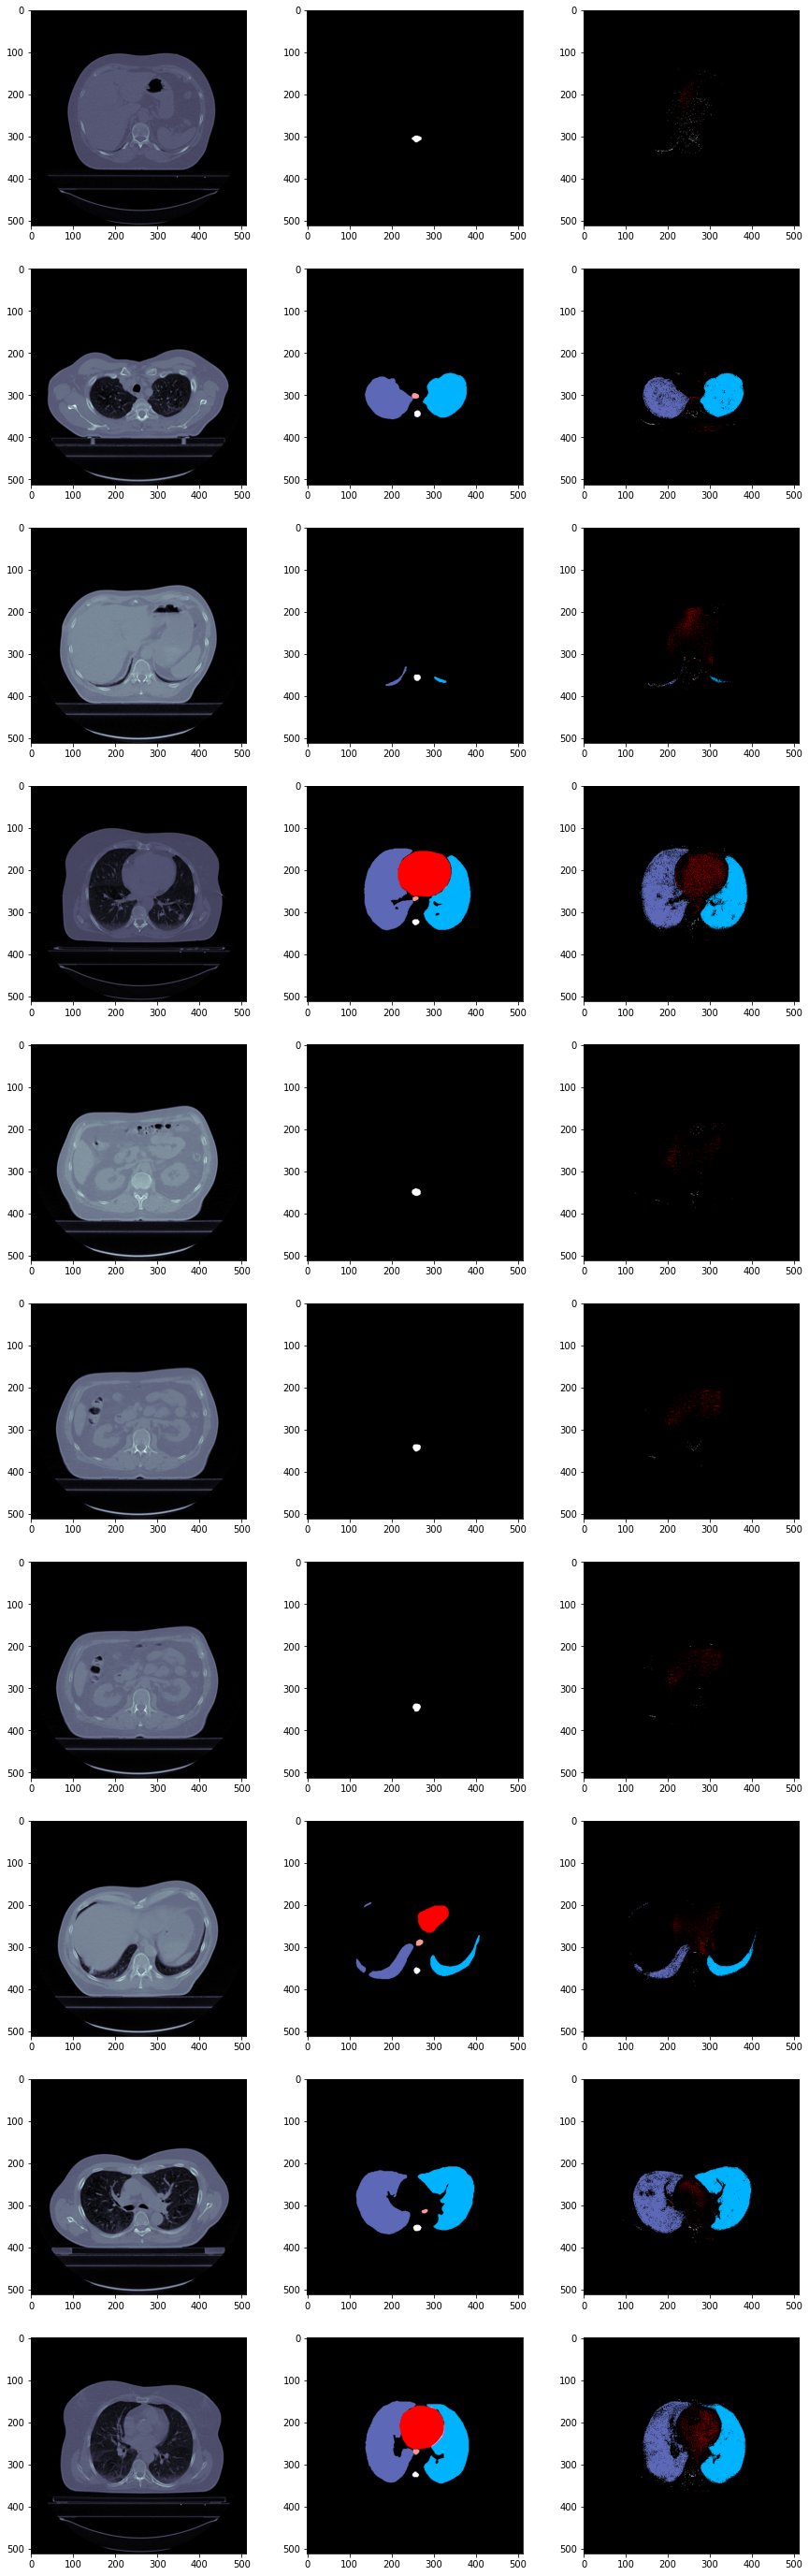

In [10]:
show_imgs(10, x_test[10:30], y_test[10:30], preds[10:30])

In [3]:
#LOADING DATA FOR NEXT TRAINING
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16.npy")[200:400, :, :, :]
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16.npy")[200:400, :, :, :]

In [4]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.4, random_state=4)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5, random_state=4)


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]

In [5]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_model', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})


In [6]:
seg_model2 = UNet(img_shape = (H, W, 1), num_of_class = C, loaded_model = loaded_model, path = "saved_models/UNet_model_run_2", learning_rate = 2e-4, do_drop = True, drop_rate = 0.5)
seg_model2.build_model_VGG13()

In [7]:
history = seg_model2.train(x_train, y_train, x_valid, y_valid, epoch = 20, batch_size = 2)

Epoch 1/20
60/60 [==============================] - 866s 14s/step - loss: 0.2193 - dice_coef_multilabel: 0.0843 - iou_multilabel: 0.0543 - val_loss: 0.0899 - val_dice_coef_multilabel: 0.1200 - val_iou_multilabel: 0.0794
INFO:tensorflow:Assets written to: saved_models/UNet_model_run_2/assets
Epoch 2/20
60/60 [==============================] - 892s 15s/step - loss: 0.0562 - dice_coef_multilabel: 0.2219 - iou_multilabel: 0.1830 - val_loss: 0.0530 - val_dice_coef_multilabel: 0.2577 - val_iou_multilabel: 0.2293
INFO:tensorflow:Assets written to: saved_models/UNet_model_run_2/assets
Epoch 3/20
60/60 [==============================] - 979s 16s/step - loss: 0.0416 - dice_coef_multilabel: 0.2658 - iou_multilabel: 0.2364 - val_loss: 0.0286 - val_dice_coef_multilabel: 0.2718 - val_iou_multilabel: 0.2467
INFO:tensorflow:Assets written to: saved_models/UNet_model_run_2/assets
Epoch 4/20
60/60 [==============================] - 1041s 17s/step - loss: 0.0277 - dice_coef_multilabel: 0.2895 - iou_multi

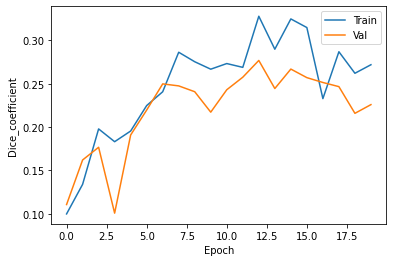

In [10]:
plot_dice(history)

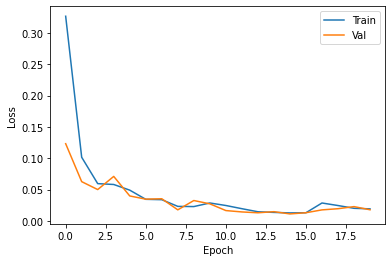

In [11]:
plot_loss(history)

In [7]:
preds = seg_model2.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())


TEST DICE_COEF:  0.7119273
TEST IoU:  0.6290037


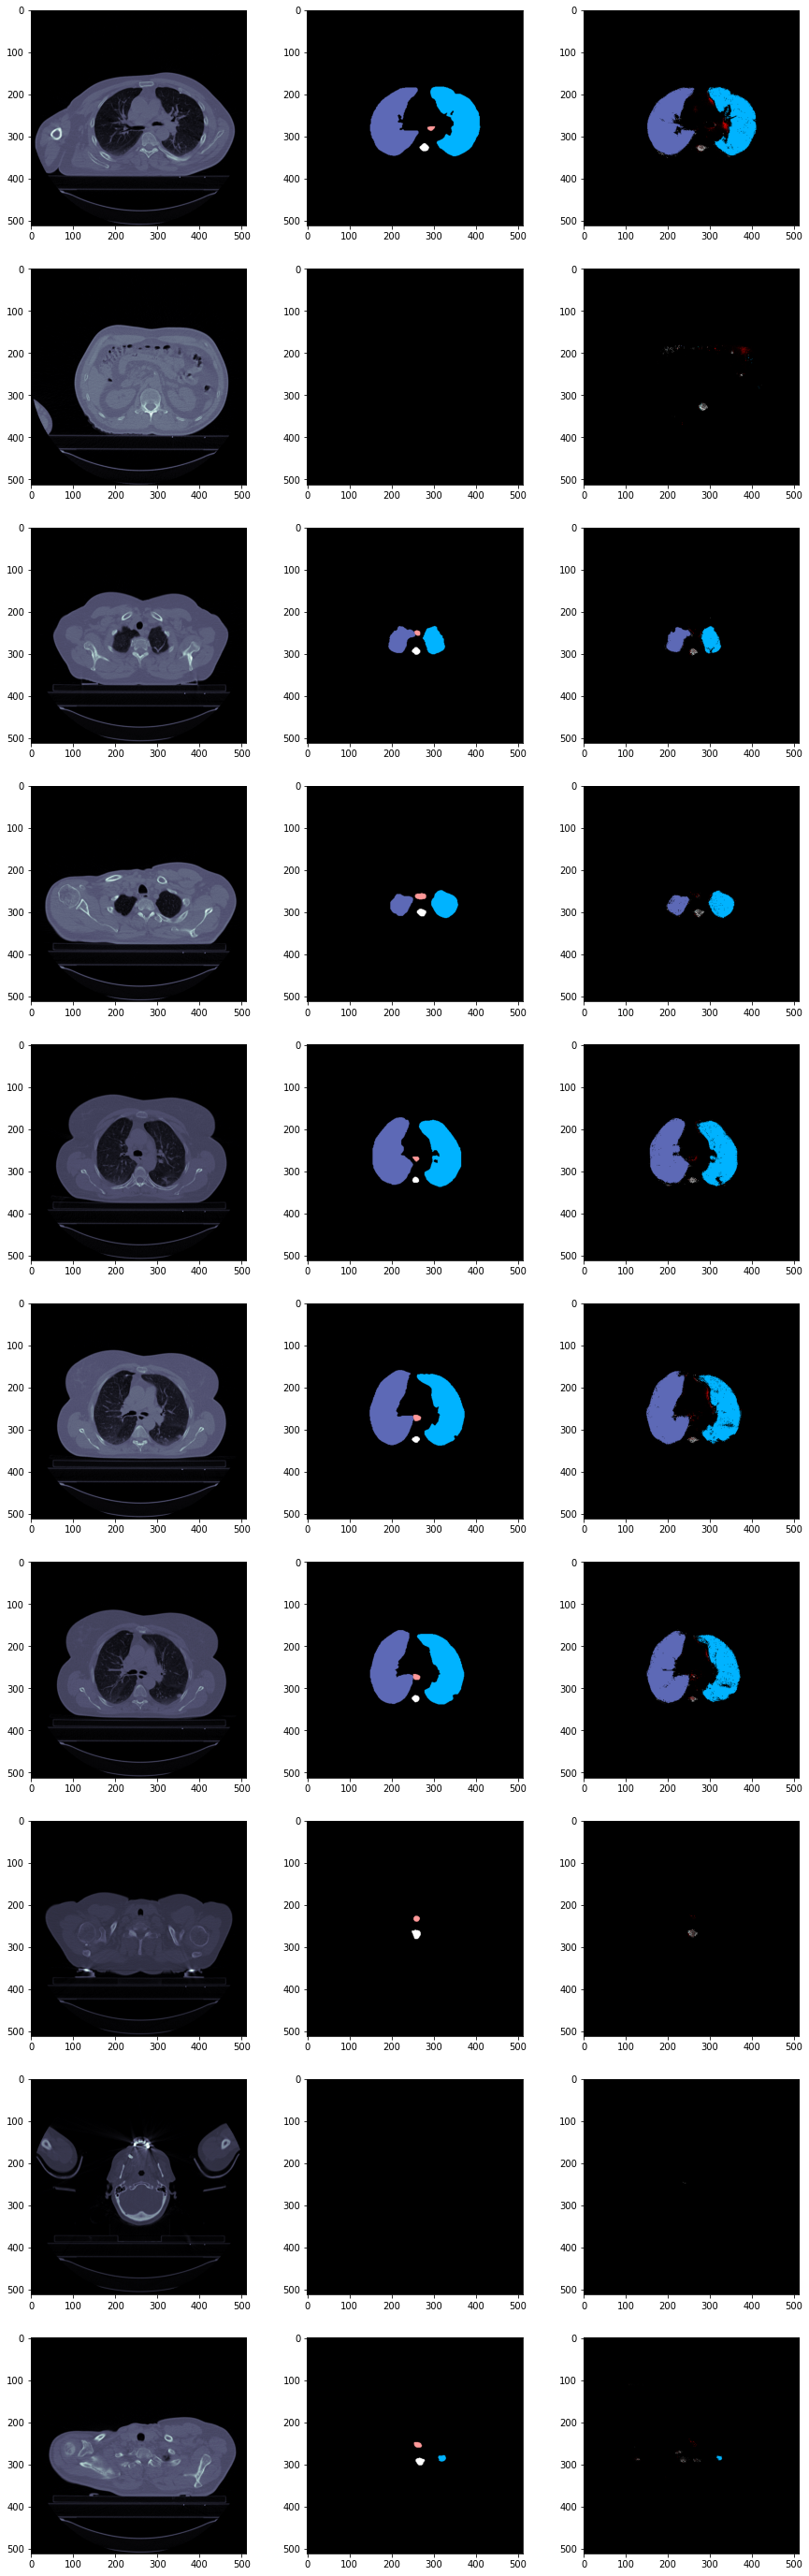

In [8]:
show_num = 20
show_imgs(10, x_test[10:30], y_test[10:30], preds[10:30])